###   Random analysis - I got familiar with data: connections between tables, clarity, quality and quantity of data

In [92]:
#  importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Users data

In [51]:
users_raw = pd.read_csv('../Raw_data/users.csv')

In [52]:
users_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CREATED_AT  5000 non-null   object
 1   USER_ID     5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [53]:
users_raw.tail(2)

,CREATED_AT,USER_ID
4998,2019-03-23 11:43:05.437,1343380
4999,2020-04-24 17:12:12.495,2443824


### Orders data

In [54]:
orders_raw = pd.read_csv('../Raw_data/orders.csv')

In [55]:
orders_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22050 entries, 0 to 22049
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID                               22050 non-null  int64 
 1   USER_ID                          22050 non-null  int64 
 2   CREATED_AT                       22050 non-null  object
 3   PRODUCT_ID                       22050 non-null  int64 
 4   TOTAL_COST_PENNIES               22050 non-null  int64 
 5   TOTAL_COST_PRE_DISCOUNT_PENNIES  22050 non-null  int64 
 6   SOURCE                           22050 non-null  object
dtypes: int64(5), object(2)
memory usage: 1.2+ MB


In [56]:
orders_raw.tail(2)

,ID,USER_ID,CREATED_AT,PRODUCT_ID,TOTAL_COST_PENNIES,TOTAL_COST_PRE_DISCOUNT_PENNIES,SOURCE
22048,118251626,1877174,2020-08-12 16:03:19.196,618,6750,7500,web
22049,118258826,2718801,2020-08-13 10:10:32.884,107,2070,2300,iOS


In [57]:
# discount calculation

orders_raw['discount%'] = ((orders_raw.TOTAL_COST_PRE_DISCOUNT_PENNIES - orders_raw.TOTAL_COST_PENNIES)
                          / orders_raw.TOTAL_COST_PRE_DISCOUNT_PENNIES * 100)
orders_raw['round_discount'] = orders_raw['discount%'].round(-1)
orders_raw.head(3)

,ID,USER_ID,CREATED_AT,PRODUCT_ID,TOTAL_COST_PENNIES,TOTAL_COST_PRE_DISCOUNT_PENNIES,SOURCE,discount%,round_discount
0,110786050,440133,2017-03-23 10:29:59.650,193,1800,2000,web,10.000000,10.0
1,114247432,386193,2019-10-09 16:59:53.209,1782,1870,2200,web,15.000000,20.0
2,114242128,1747736,2019-10-08 20:38:14.728,2148,3200,4200,web,23.809524,20.0


In [58]:
# how many orders were made with discounts
orders_with_discount = len(orders_raw[orders_raw['discount%'] > 0])

# Count total orders
total_orders = len(orders_raw)
print(f"Percentage: {orders_with_discount/total_orders*100:.1f}%")

Percentage: 67.2%


In [59]:
# how many users buy with discount
users_with_discount = orders_raw[orders_raw['discount%'] > 0]['USER_ID'].nunique()
total_users = orders_raw['USER_ID'].nunique()
print(f"Percentage: {users_with_discount/total_users*100:.1f}%")

Percentage: 91.0%


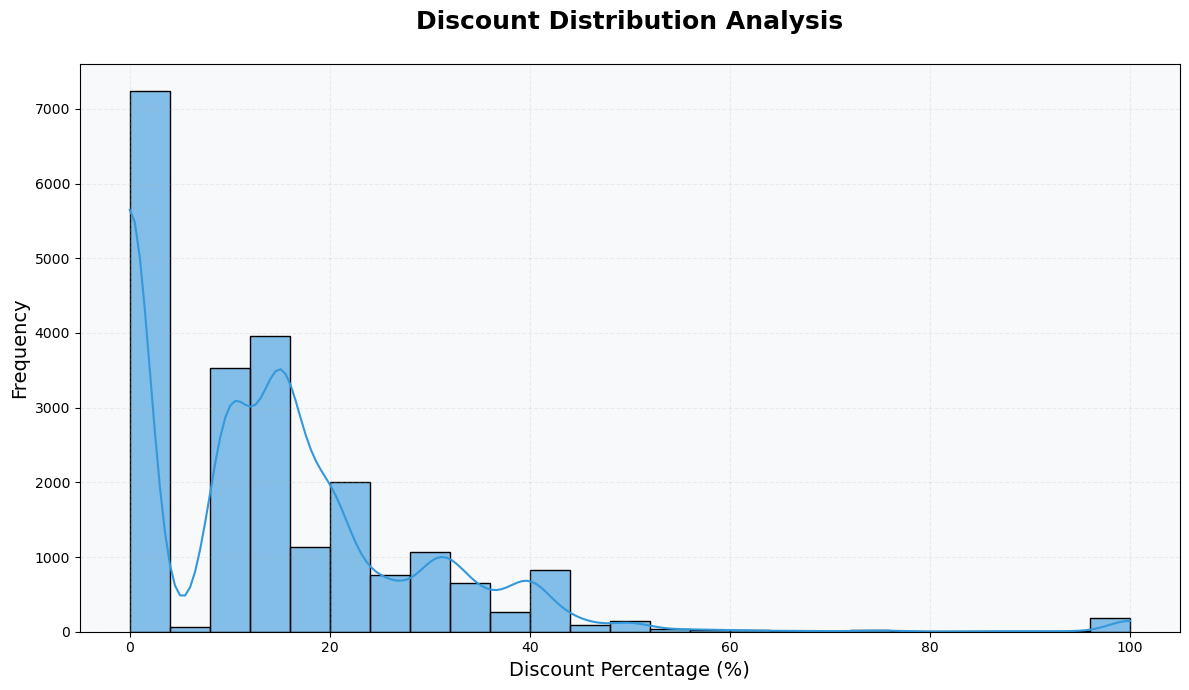

In [60]:
# Discount Distribution Analysis
plt.figure(figsize=(12, 7))

sns.histplot(
    data=orders_raw, 
    x='discount%',
    bins=25,
    kde=True,
    color='#3498db',           
    alpha=0.6
)

plt.title('Discount Distribution Analysis', fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Discount Percentage (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.gca().set_facecolor('#f8f9fa')
plt.grid(True, alpha=0.2, linestyle='--')

plt.tight_layout()
plt.show()

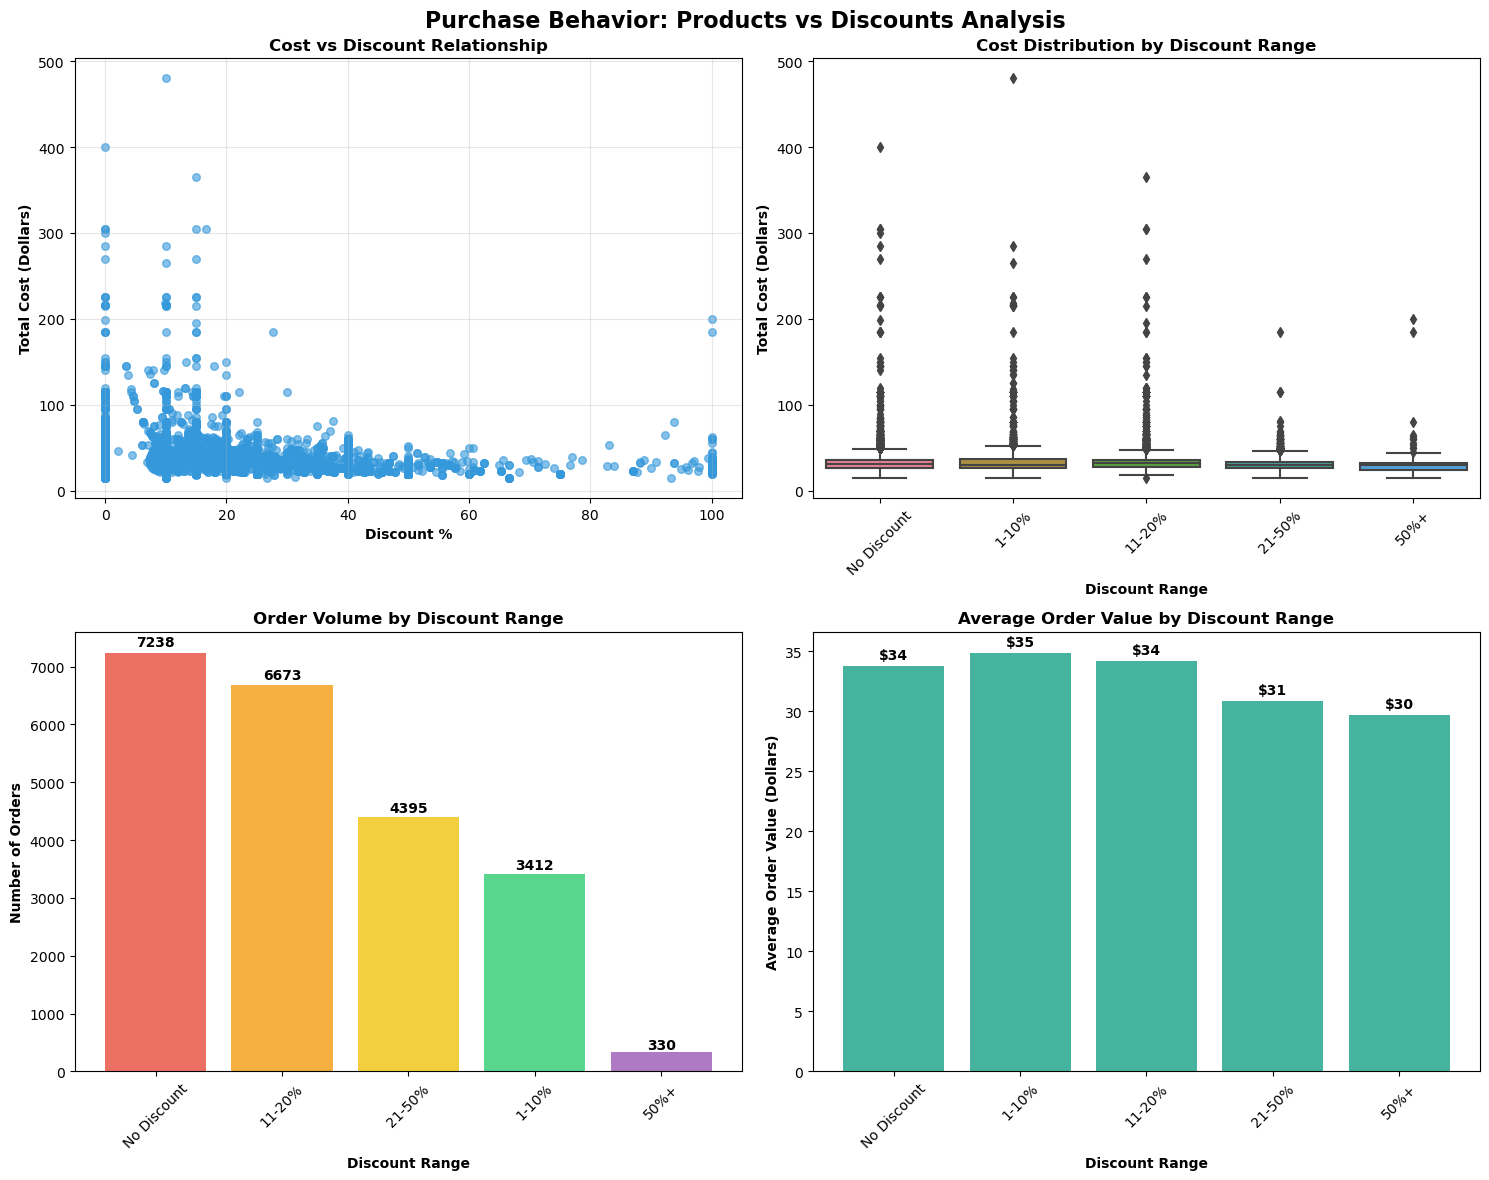

=== PURCHASE BEHAVIOR ANALYSIS ===

Total orders: 22,050
Orders with discount: 14,810
Orders without discount: 7,238

Average order value:
- With discount: $33.23
- Without discount: $33.77

Discount distribution:
- No Discount: 7,238 orders (32.8%)
- 11-20%: 6,673 orders (30.3%)
- 21-50%: 4,395 orders (19.9%)
- 1-10%: 3,412 orders (15.5%)
- 50%+: 330 orders (1.5%)

Correlation between discount% and order value: -0.086
→ Little to no correlation between discount and order value


In [61]:

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Purchase Behavior: Products vs Discounts Analysis', fontsize=16, fontweight='bold')

# 1. Scatter plot: Total Cost vs Discount %
ax1 = axes[0, 0]
# Convert pennies to dollars for better readability
orders_raw['total_cost_dollars'] = orders_raw['TOTAL_COST_PRE_DISCOUNT_PENNIES'] / 100

scatter = ax1.scatter(orders_raw['discount%'], orders_raw['total_cost_dollars'], 
                     alpha=0.6, s=30, c='#3498db')
ax1.set_xlabel('Discount %', fontweight='bold')
ax1.set_ylabel('Total Cost (Dollars)', fontweight='bold')
ax1.set_title('Cost vs Discount Relationship', fontweight='bold')
ax1.grid(True, alpha=0.3)

# 2. Box plot: Cost distribution by discount ranges
ax2 = axes[0, 1]
# Create discount bins
orders_raw['discount_bin'] = pd.cut(orders_raw['discount%'], 
                                   bins=[-1, 0, 10, 20, 50, 100], 
                                   labels=['No Discount', '1-10%', '11-20%', '21-50%', '50%+'])

sns.boxplot(data=orders_raw, x='discount_bin', y='total_cost_dollars', ax=ax2)
ax2.set_xlabel('Discount Range', fontweight='bold')
ax2.set_ylabel('Total Cost (Dollars)', fontweight='bold')
ax2.set_title('Cost Distribution by Discount Range', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

# 3. Histogram: Distribution of purchases by discount ranges
ax3 = axes[1, 0]
discount_counts = orders_raw['discount_bin'].value_counts()
colors = ['#e74c3c', '#f39c12', '#f1c40f', '#2ecc71', '#9b59b6']
bars = ax3.bar(discount_counts.index, discount_counts.values, color=colors, alpha=0.8)
ax3.set_xlabel('Discount Range', fontweight='bold')
ax3.set_ylabel('Number of Orders', fontweight='bold')
ax3.set_title('Order Volume by Discount Range', fontweight='bold')
ax3.tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# 4. Average order value by discount range
ax4 = axes[1, 1]
avg_cost_by_discount = orders_raw.groupby('discount_bin')['total_cost_dollars'].mean()
bars2 = ax4.bar(avg_cost_by_discount.index, avg_cost_by_discount.values, 
                color='#16a085', alpha=0.8)
ax4.set_xlabel('Discount Range', fontweight='bold')
ax4.set_ylabel('Average Order Value (Dollars)', fontweight='bold')
ax4.set_title('Average Order Value by Discount Range', fontweight='bold')
ax4.tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'${height:.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print("=== PURCHASE BEHAVIOR ANALYSIS ===")
print(f"\nTotal orders: {len(orders_raw):,}")
print(f"Orders with discount: {len(orders_raw[orders_raw['discount%'] > 0]):,}")
print(f"Orders without discount: {len(orders_raw[orders_raw['discount%'] == 0]):,}")

print(f"\nAverage order value:")
print(f"- With discount: ${orders_raw[orders_raw['discount%'] > 0]['total_cost_dollars'].mean():.2f}")
print(f"- Without discount: ${orders_raw[orders_raw['discount%'] == 0]['total_cost_dollars'].mean():.2f}")

print(f"\nDiscount distribution:")
for category, count in discount_counts.items():
    percentage = (count / len(orders_raw)) * 100
    print(f"- {category}: {count:,} orders ({percentage:.1f}%)")

# Correlation analysis
correlation = orders_raw['discount%'].corr(orders_raw['total_cost_dollars'])
print(f"\nCorrelation between discount% and order value: {correlation:.3f}")
if correlation > 0.1:
    print("→ Higher discounts tend to be associated with higher order values")
elif correlation < -0.1:
    print("→ Higher discounts tend to be associated with lower order values")
else:
    print("→ Little to no correlation between discount and order value")

In [62]:
# how users made thier choice by product or discount
corr = (orders_raw[['USER_ID', 'PRODUCT_ID', 
                   'TOTAL_COST_PRE_DISCOUNT_PENNIES', 'discount%']].corr())


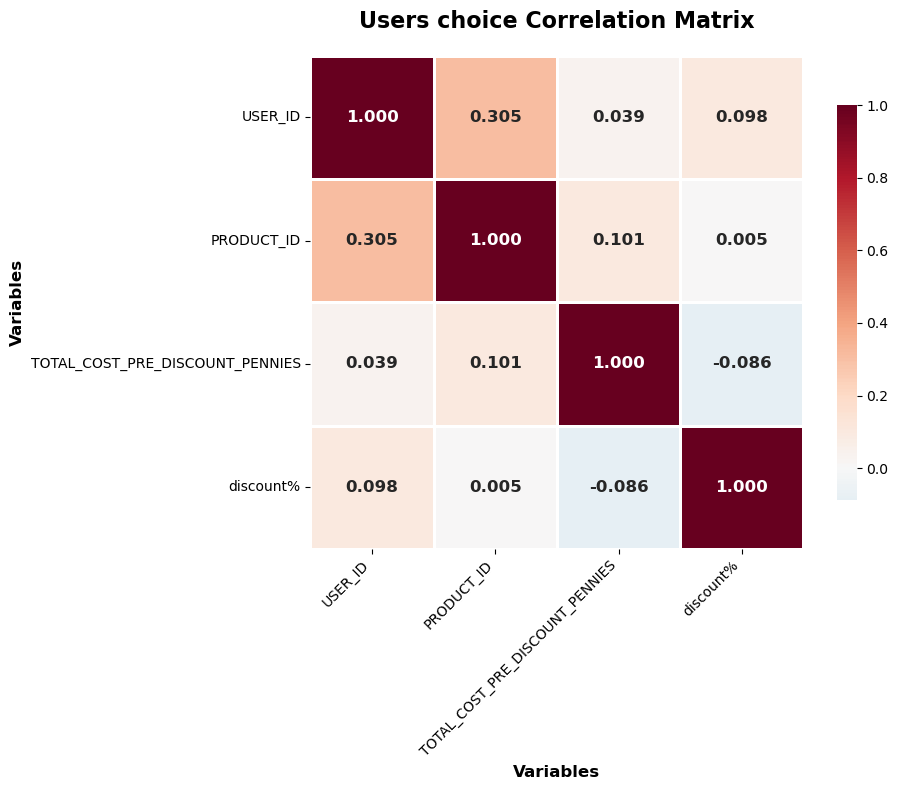

In [63]:

plt.figure(figsize=(10, 8))

sns.heatmap(corr, 
            annot=True,                    
            cmap='RdBu_r',                # Red-Blue colormap
            center=0,                     # Center colormap at 0
            square=True,                  
            fmt='.3f',                    # 3 decimal places
            cbar_kws={'shrink': 0.8},     
            annot_kws={'size': 12, 'weight': 'bold'}, 
            linewidths=1,                 # Add lines between cells
            linecolor='white')           

# Annotation
plt.title('Users choice Correlation Matrix', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Variables', fontsize=12, fontweight='bold')
plt.ylabel('Variables', fontsize=12, fontweight='bold')

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()

In [64]:
 # Product popularity heat map
discount_corr = (pd.DataFrame(orders_raw.groupby(['PRODUCT_ID', 'round_discount']).ID.count().rename('num_purches')
                              .reset_index()))
temp = discount_corr.groupby('PRODUCT_ID').num_purches.sum().rename('total_sum')
discount_corr = discount_corr.join(temp, on = 'PRODUCT_ID')
discount_corr['%sold'] = (discount_corr.num_purches / discount_corr.total_sum).round(1)
corr_product_discount = (discount_corr[['PRODUCT_ID', 
                   'num_purches', '%sold']].corr())



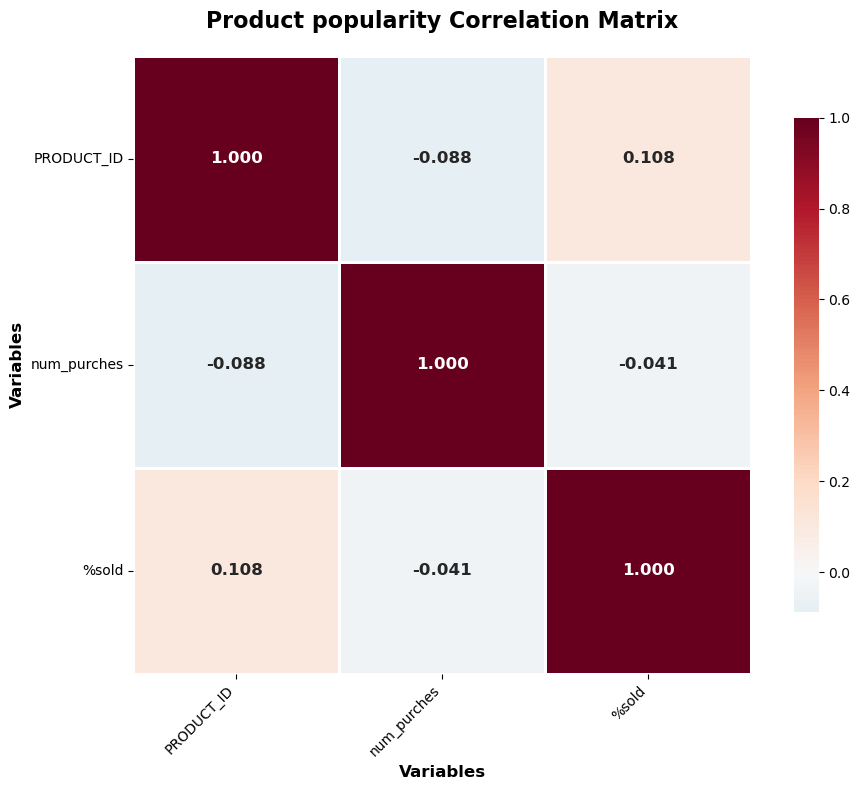

In [65]:
plt.figure(figsize=(10, 8))

sns.heatmap(corr_product_discount, 
            annot=True,                    
            cmap='RdBu_r',                # Red-Blue colormap
            center=0,                     # Center colormap at 0
            square=True,                  
            fmt='.3f',                    # 3 decimal places
            cbar_kws={'shrink': 0.8},     
            annot_kws={'size': 12, 'weight': 'bold'}, 
            linewidths=1,                 # Add lines between cells
            linecolor='white')           

# Annotation
plt.title('Product popularity Correlation Matrix', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Variables', fontsize=12, fontweight='bold')
plt.ylabel('Variables', fontsize=12, fontweight='bold')

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()

In [66]:
 # User behaviour heat map
discount_corr_users = (pd.DataFrame(orders_raw.groupby(['USER_ID', 'round_discount'])
                            .ID.count().rename('num_purches')
                              .reset_index()))
temp_users = discount_corr_users.groupby('USER_ID').num_purches.sum().rename('total_sum')
discount_corr_users = discount_corr_users.join(temp_users, on = 'USER_ID')
discount_corr_users['%sold'] = (discount_corr_users.num_purches / discount_corr_users.total_sum).round(1)
corr_product_discount_users = (discount_corr_users[['USER_ID', 
                   'num_purches', '%sold', 'round_discount']].corr())


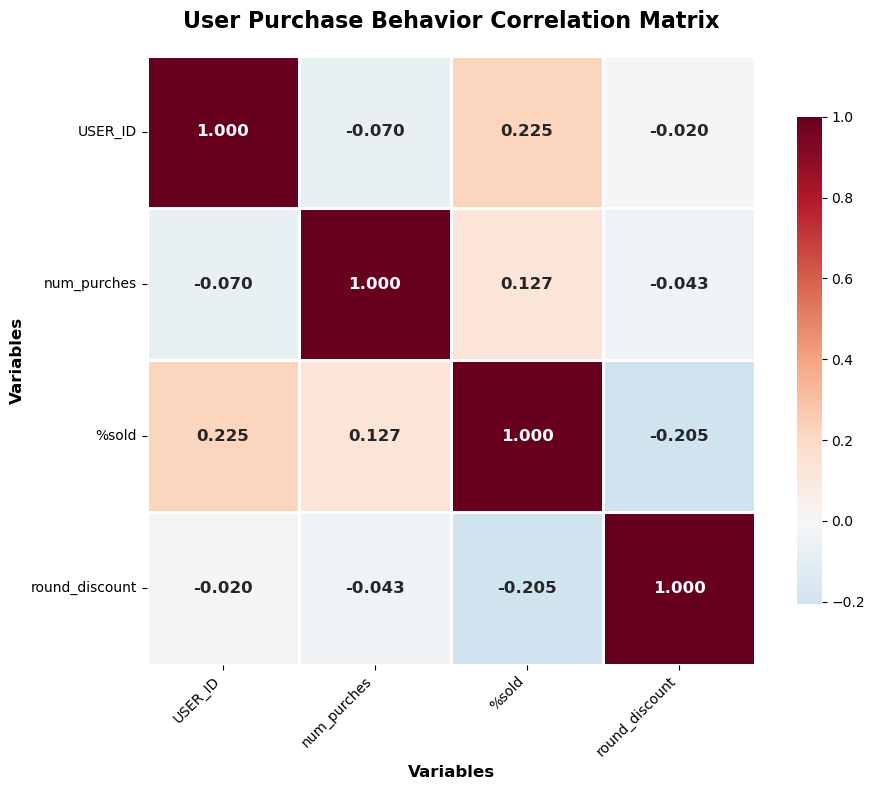

In [67]:
plt.figure(figsize=(10, 8))

sns.heatmap(corr_product_discount_users, 
            annot=True,                    
            cmap='RdBu_r',                # Red-Blue colormap
            center=0,                     # Center colormap at 0
            square=True,                  
            fmt='.3f',                    # 3 decimal places
            cbar_kws={'shrink': 0.8},     
            annot_kws={'size': 12, 'weight': 'bold'}, 
            linewidths=1,                 # Add lines between cells
            linecolor='white')           

# Annotation
plt.title('User Purchase Behavior Correlation Matrix', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Variables', fontsize=12, fontweight='bold')
plt.ylabel('Variables', fontsize=12, fontweight='bold')

# Rotate labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()

### emails_sent data

In [68]:
emails_sent_raw = pd.read_csv('../Raw_data/emails_sent.csv')

In [69]:
emails_sent_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828553 entries, 0 to 828552
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   USER_ID         828553 non-null  int64 
 1   CAMPAIGN_ID     828553 non-null  object
 2   VARIATION_NAME  825669 non-null  object
 3   SENT_AT         828553 non-null  object
 4   OPENED_EMAIL    186943 non-null  object
dtypes: int64(1), object(4)
memory usage: 31.6+ MB


In [70]:
emails_sent_raw.head(3)

,USER_ID,CAMPAIGN_ID,VARIATION_NAME,SENT_AT,OPENED_EMAIL
0,2084572,55e05c6619f3b0b58685269d0fbb56c9,Original,2020-02-17T07:01:03.065Z,True
1,2084572,acf16f627094695a3bb33e7546c36df9,Joyful shot- YESPLEASE,2020-02-16T18:30:18.448Z,NaN
2,2084572,1daa83a96adf94499d57c8a0bd20d428,offer displayed,2020-02-17T12:03:24.896Z,NaN


In [71]:
# how effective to sent emails

# people % who open email at least once

users_opened_any = emails_sent_raw[emails_sent_raw['OPENED_EMAIL'] == True]['USER_ID'].nunique()
total_users = emails_sent_raw['USER_ID'].nunique()
print(users_opened_any / total_users * 100)

96.14911921343712


In [72]:
#  % who didn't open the last email

emails_sent_raw['SENT_AT'] = pd.to_datetime(emails_sent_raw['SENT_AT'])
latest_emails = emails_sent_raw.loc[emails_sent_raw.groupby('USER_ID')['SENT_AT'].idxmax()]
users_didnt_open_last = len(latest_emails[latest_emails['OPENED_EMAIL'] == False])
total_users = len(latest_emails)

print(users_didnt_open_last / total_users * 100)

0.0


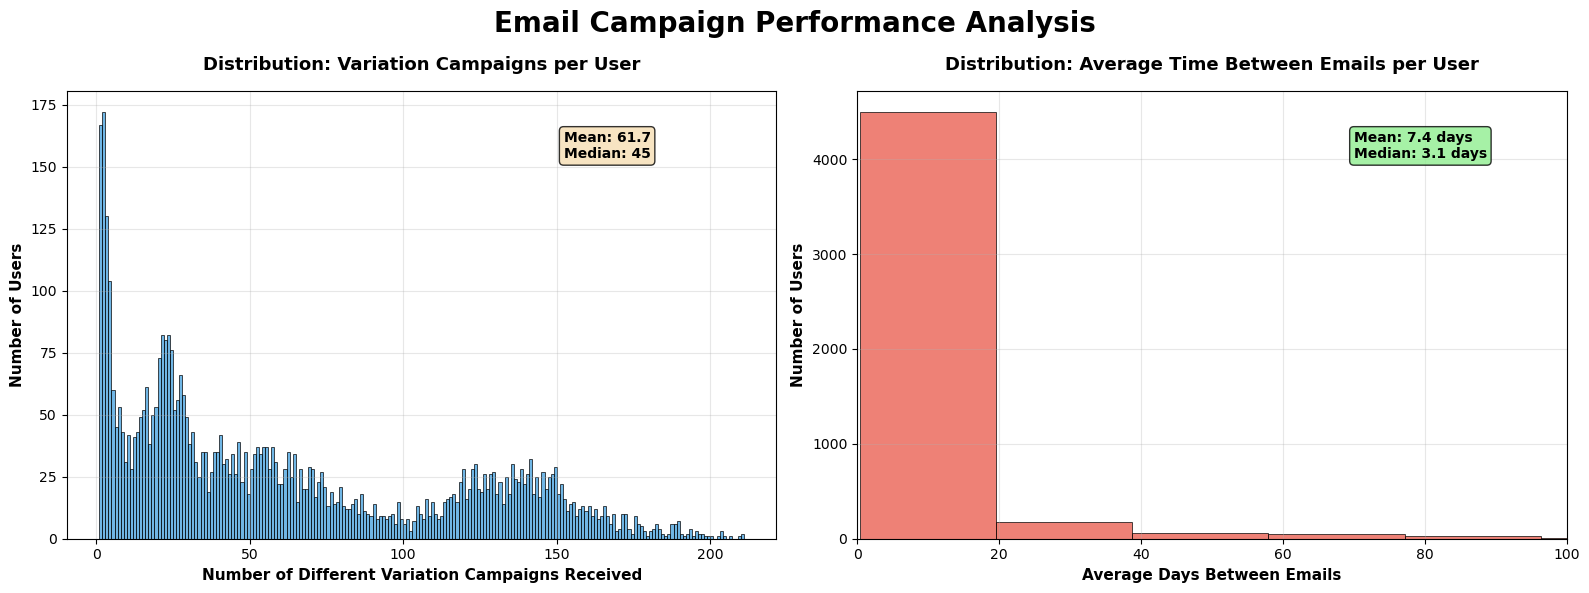

In [73]:

plt.style.use('default')
sns.set_palette("husl")

# Convert SENT_AT to datetime
emails_sent_raw['SENT_AT'] = pd.to_datetime(emails_sent_raw['SENT_AT'])

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Email Campaign Performance Analysis', fontsize=20, fontweight='bold', y=0.98)

# 1. Distribution of variation campaigns per user
ax1 = axes[0]
user_variation_counts = emails_sent_raw.groupby('USER_ID')['VARIATION_NAME'].nunique()

# Create histogram
bins = range(1, user_variation_counts.max() + 2)
ax1.hist(user_variation_counts, bins=bins, alpha=0.7, color='#3498db', edgecolor='black', linewidth=0.7)
ax1.set_xlabel('Number of Different Variation Campaigns Received', fontweight='bold', fontsize=11)
ax1.set_ylabel('Number of Users', fontweight='bold', fontsize=11)
ax1.set_title('Distribution: Variation Campaigns per User', fontweight='bold', fontsize=13, pad=15)
ax1.grid(True, alpha=0.3)

# Add statistics text
mean_variations = user_variation_counts.mean()
median_variations = user_variation_counts.median()
ax1.text(0.7, 0.85, f'Mean: {mean_variations:.1f}\nMedian: {median_variations:.0f}', 
         transform=ax1.transAxes, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8),
         fontsize=10, fontweight='bold')

# 2. Distribution of average time between emails per user
ax2 = axes[1]
user_time_gaps = []

for user_id in emails_sent_raw['USER_ID'].unique():
    user_emails = emails_sent_raw[emails_sent_raw['USER_ID'] == user_id].sort_values('SENT_AT')
    if len(user_emails) > 1:
        time_diffs = user_emails['SENT_AT'].diff().dropna()
        avg_gap_days = time_diffs.dt.total_seconds().mean() / (24 * 3600)  # Convert to days
        user_time_gaps.append(avg_gap_days)

user_time_gaps = pd.Series(user_time_gaps)

# Create histogram with better binning
ax2.hist(user_time_gaps, bins=30, alpha=0.7, color='#e74c3c', edgecolor='black', linewidth=0.7)
ax2.set_xlabel('Average Days Between Emails', fontweight='bold', fontsize=11)
ax2.set_ylabel('Number of Users', fontweight='bold', fontsize=11)
ax2.set_title('Distribution: Average Time Between Emails per User', fontweight='bold', fontsize=13, pad=15)
ax2.set_xlim(0, 100)  # Limit x-axis to 0-100 days
ax2.grid(True, alpha=0.3)

# Add statistics text
mean_gap = user_time_gaps.mean()
median_gap = user_time_gaps.median()
ax2.text(0.7, 0.85, f'Mean: {mean_gap:.1f} days\nMedian: {median_gap:.1f} days', 
         transform=ax2.transAxes, bbox=dict(boxstyle="round", facecolor='lightgreen', alpha=0.8),
         fontsize=10, fontweight='bold')



plt.tight_layout()
plt.show()


### campaigns data

In [74]:
emails_comp_raw = pd.read_csv('../Raw_data/email_campaigns.csv')

In [75]:
emails_comp_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CAMPAIGN_ID          4459 non-null   object 
 1   NAME                 4459 non-null   object 
 2   VARIATION_NAME       4147 non-null   object 
 3   PERCENTAGE_DISCOUNT  3593 non-null   float64
dtypes: float64(1), object(3)
memory usage: 139.5+ KB


In [76]:
emails_comp_raw.head()

,CAMPAIGN_ID,NAME,VARIATION_NAME,PERCENTAGE_DISCOUNT
0,6a47a6e74a5b4250b10d6e6d7537f7d9,26/08/19 Push Notification - IOS 15% off sale ...,GIF: BOUQUETS,15.0
1,70c44a9a57cb06a141474dada8b288a5,Delivery complete (en) - 3.0,Old,15.0
2,c6dafe72c0eeb604a382fd9af47aee4d,DE - 13/09/20 - Refresh the home - 15%,15%,15.0
3,8ea4d4d1e46719f6c6edd9149d28a7e6,FB_ActiveCustomers_Test,Variant 1,20.0
4,da7cae4c808a032a244f38e7337f2a85,30/04/19 At Risk text email - 20% off,CVJ74,20.0


In [77]:
emails_comp_raw['CAMPAIGN_ID'].nunique()

3530

In [78]:
emails_comp_raw.PERCENTAGE_DISCOUNT.nunique()

14

In [79]:
emails_comp_raw.PERCENTAGE_DISCOUNT.unique()

array([ 15.,  20.,  40.,   0.,  25.,  nan,  10.,  30.,  50., 100.,  12.,
         9.,  16.,  35.,   1.])

### dataframe merge

In [98]:
emails_comp_raw = emails_comp_raw.rename(columns = {'VARIATION_NAME': 'name_campaigns'})

In [99]:
users_camp = emails_sent_raw.merge(emails_comp_raw, on = 'CAMPAIGN_ID', how = 'left')

In [100]:
users_camp.head(2)

,USER_ID,CAMPAIGN_ID,VARIATION_NAME,SENT_AT,OPENED_EMAIL,NAME,name_campaigns,PERCENTAGE_DISCOUNT
0,2084572,55e05c6619f3b0b58685269d0fbb56c9,Original,2020-02-17 07:01:03.065000+00:00,True,Confirm Purchase (en) - 5.4,NaN,15.0
1,2084572,55e05c6619f3b0b58685269d0fbb56c9,Original,2020-02-17 07:01:03.065000+00:00,True,Confirm Purchase (en) - 5.4,Original,15.0


In [101]:
orders_raw['PERCENTAGE_DISCOUNT'] = orders_raw['discount%']

In [102]:
campaign_orders = orders_raw.merge(users_camp, on = ['USER_ID', 'PERCENTAGE_DISCOUNT'], how = 'left')

In [103]:
campaign_orders['CREATED_AT'] = pd.to_datetime(campaign_orders['CREATED_AT']).dt.date
campaign_orders['SENT_AT'] = pd.to_datetime(campaign_orders['SENT_AT']).dt.tz_localize(None).dt.date

In [104]:
campaign_orders['interval'] = (campaign_orders.CREATED_AT - campaign_orders.SENT_AT).astype('timedelta64[h]')/24

In [105]:
campaign_orders = campaign_orders[(campaign_orders.interval >= 0)]

In [113]:
campaign_orders.head(2)

,user_id,product_id,total_cost_pennies,source,total_cost_pre_discount_pennies,discount%,campaign_id,sent_at,name_campaigns,opened_email,purchase
78,386193,1782,1870,web,2200,15.0,28c8c1c87f0336332ee2a1074894eb1c,2017-02-23,New template,True,0
79,386193,1782,1870,web,2200,15.0,2c7f0e90318c992d9e5c869a396e5825,2017-03-05,NaN,NaN,0


In [107]:
campaign_orders['purchase'] = np.where(campaign_orders['interval'] < 10, 1, 0)

In [108]:
campaign_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452780 entries, 78 to 1123343
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   ID                               452780 non-null  int64   
 1   USER_ID                          452780 non-null  int64   
 2   CREATED_AT                       452780 non-null  object  
 3   PRODUCT_ID                       452780 non-null  int64   
 4   TOTAL_COST_PENNIES               452780 non-null  int64   
 5   TOTAL_COST_PRE_DISCOUNT_PENNIES  452780 non-null  int64   
 6   SOURCE                           452780 non-null  object  
 7   discount%                        452780 non-null  float64 
 8   round_discount                   452780 non-null  float64 
 9   total_cost_dollars               452780 non-null  float64 
 10  discount_bin                     452780 non-null  category
 11  PERCENTAGE_DISCOUNT              452780 non-null  

In [109]:
campaign_orders.head(2)

,ID,USER_ID,CREATED_AT,PRODUCT_ID,TOTAL_COST_PENNIES,TOTAL_COST_PRE_DISCOUNT_PENNIES,SOURCE,discount%,round_discount,total_cost_dollars,discount_bin,PERCENTAGE_DISCOUNT,CAMPAIGN_ID,VARIATION_NAME,SENT_AT,OPENED_EMAIL,NAME,name_campaigns,interval,purchase
78,114247432,386193,2019-10-09,1782,1870,2200,web,15.0,20.0,22.0,11-20%,15.0,28c8c1c87f0336332ee2a1074894eb1c,New template,2017-02-23,True,1st purchase programme - education email,New template,958.0,0
79,114247432,386193,2019-10-09,1782,1870,2200,web,15.0,20.0,22.0,11-20%,15.0,2c7f0e90318c992d9e5c869a396e5825,Variant 1,2017-03-05,NaN,05/03/17 - BODEN launch,NaN,948.0,0


In [110]:
campaign_orders = campaign_orders[['USER_ID',
                                  'PRODUCT_ID',
                                  'TOTAL_COST_PENNIES',
                                  'SOURCE',
                                  'TOTAL_COST_PRE_DISCOUNT_PENNIES',
                                  'discount%',
                                  'CAMPAIGN_ID',
                                  'SENT_AT',
                                  'name_campaigns',
                                  'OPENED_EMAIL',
                                  'purchase']]
campaign_orders.columns = campaign_orders.columns.str.lower()


In [111]:
campaign_orders = campaign_orders.drop_duplicates()

In [112]:
campaign_orders

,user_id,product_id,total_cost_pennies,source,total_cost_pre_discount_pennies,discount%,campaign_id,sent_at,name_campaigns,opened_email,purchase
78,386193,1782,1870,web,2200,15.0,28c8c1c87f0336332ee2a1074894eb1c,2017-02-23,New template,True,0
79,386193,1782,1870,web,2200,15.0,2c7f0e90318c992d9e5c869a396e5825,2017-03-05,NaN,NaN,0
80,386193,1782,1870,web,2200,15.0,eaeefcf45446021f396ff0d63c57983a,2017-03-09,NaN,True,0
81,386193,1782,1870,web,2200,15.0,eaeefcf45446021f396ff0d63c57983a,2017-03-09,Variant 1,True,0
82,386193,1782,1870,web,2200,15.0,a9790a1f76d7f6f19de78353393023f2,2017-06-13,Variant 2 - video version B,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
1123339,2718801,107,2070,iOS,2300,10.0,1132c36f5f3b38f7166fa97805d028c0,2020-05-24,new template + copy,True,0
1123340,2718801,107,2070,iOS,2300,10.0,3edc057cc3f10843556dca0f3fa4d722,2020-07-02,10%,True,0
1123341,2718801,107,2070,iOS,2300,10.0,3edc057cc3f10843556dca0f3fa4d722,2020-07-02,NaN,True,0
1123342,2718801,107,2070,iOS,2300,10.0,7dabe2112bee48c978b05591c9cb91eb,2020-08-03,Generic,True,0


In [115]:
join_dataset = campaign_orders.to_csv('../Project_datasets/campaign_orders.csv', index=False)